<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。
import numpy as np
import matplotlib.pyplot as plt

N_ROWS = 8
N_COLS = 8
N_SQUARES = N_ROWS * N_COLS # 64

indices = np.arange(N_SQUARES, dtype=np.uint64)

board_flat = 2 ** indices

board_8x8 = board_flat.reshape(N_ROWS, N_COLS)

print("--- Implementación del Tablero 8x8 ---")
print(f"El número de granos en la última casilla (2^63) es: {board_8x8[-1, -1]:,}")
print(f"El tipo de dato utilizado es: {board_8x8.dtype}")

--- Implementación del Tablero 8x8 ---
El número de granos en la última casilla (2^63) es: 9,223,372,036,854,775,808
El tipo de dato utilizado es: uint64


In [23]:
###################################################################################################################

In [24]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [25]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [26]:
# Convertir a ndarray
small_board_ndarray = np.array(small_board_list)

# Remodelar a un tablero de 2x2
board_2x2 = small_board_ndarray.reshape(2, 2)

print("--- Tablero 2x2 ---")
print("Granos por casilla (2x2):\n", board_2x2)

--- Tablero 2x2 ---
Granos por casilla (2x2):
 [[1 2]
 [4 8]]


In [ ]:
####################################################################################################################

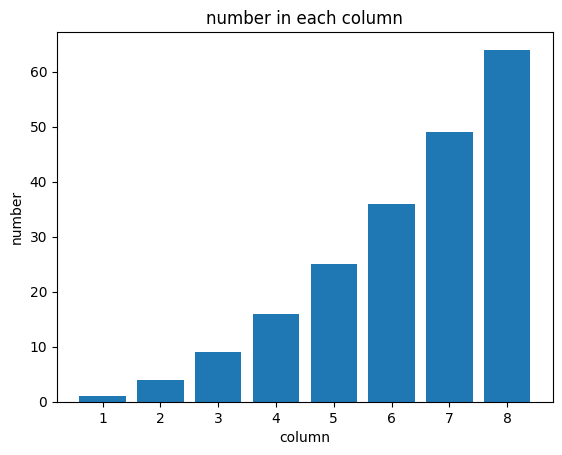

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,8+1), np.arange(1,8+1)**2) # 各列の数を仮の値で示しています
plt.show()

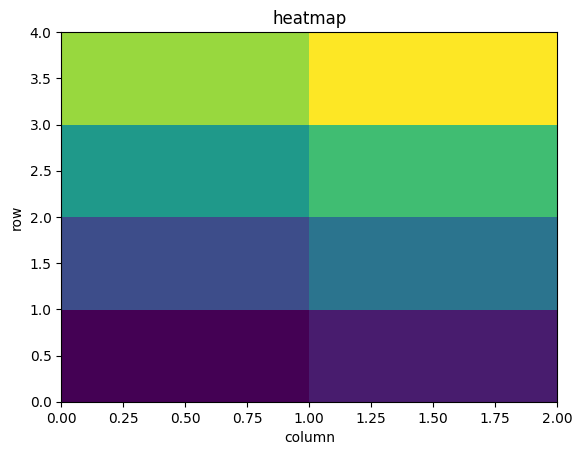

In [29]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

In [14]:
total_grains = board_8x8.sum()

average_grains_per_column = board_8x8.mean(axis=0)

print("\n--- Resultados de Agregación ---")
print(f"Número TOTAL de granos: {total_grains:,.0f}")
print("Promedio de granos por columna:\n", average_grains_per_column)


--- Resultados de Agregación ---
Número TOTAL de granos: 18,446,744,073,709,551,616
Promedio de granos por columna:
 [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


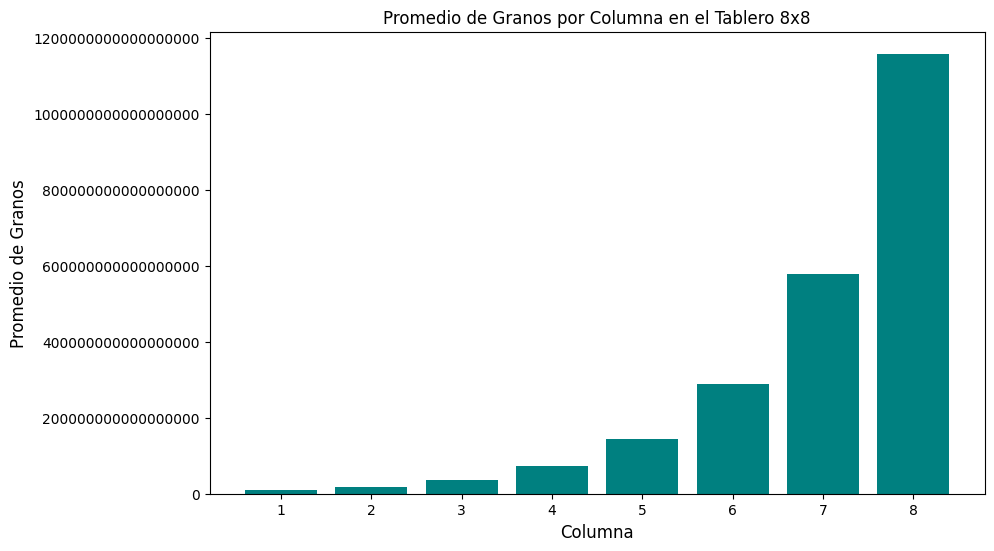

In [15]:
columns = np.arange(1, N_COLS + 1)

plt.figure(figsize=(10, 6))
plt.xlabel("Columna", fontsize=12)
plt.ylabel("Promedio de Granos", fontsize=12)
plt.title("Promedio de Granos por Columna en el Tablero 8x8")

plt.bar(columns, average_grains_per_column, color='teal')
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica en el eje Y
plt.show()

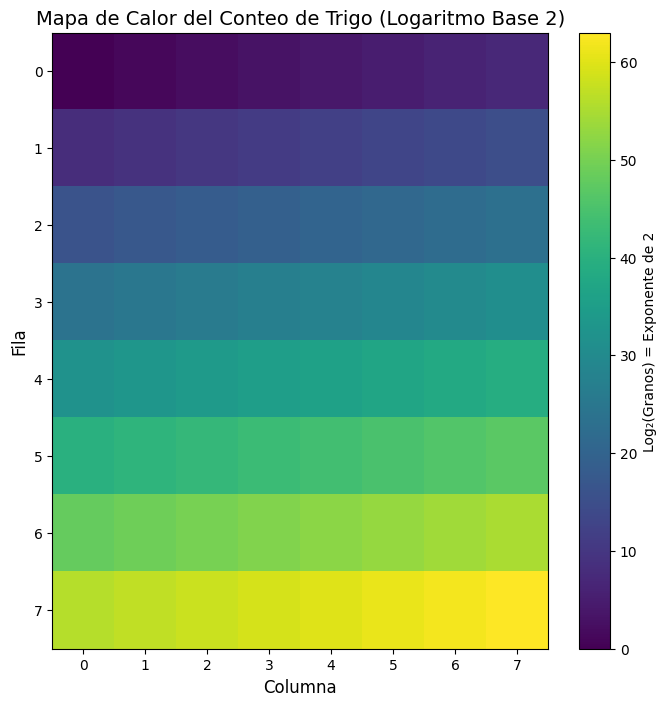

In [16]:
plt.figure(figsize=(8, 8))
plt.xlabel("Columna", fontsize=12)
plt.ylabel("Fila", fontsize=12)
plt.title("Mapa de Calor del Conteo de Trigo (Logaritmo Base 2)", fontsize=14)

log_board = np.log2(board_8x8)

plt.pcolor(log_board, cmap='viridis')

cbar = plt.colorbar(label='Log₂(Granos) = Exponente de 2')

plt.yticks(np.arange(N_ROWS) + 0.5, np.arange(N_ROWS))
plt.xticks(np.arange(N_COLS) + 0.5, np.arange(N_COLS))
plt.gca().invert_yaxis() # La fila 0 debe estar arriba

plt.show()

In [33]:
###########################################################################################################

In [34]:
first_half_grains = board_8x8[:4, :].sum()

second_half_grains = board_8x8[4:, :].sum()
ratio = second_half_grains / first_half_grains

print("\n--- Comparación de la Segunda Mitad ---")
print(f"Granos en la Primera Mitad: {first_half_grains:,.0f}")
print(f"Granos en la Segunda Mitad: {second_half_grains:,.0f}")
print(f"La Segunda Mitad es {ratio:,.0f} veces más grande que la Primera Mitad.")


--- Comparación de la Segunda Mitad ---
Granos en la Primera Mitad: 4,294,967,295
Granos en la Segunda Mitad: 18,446,744,069,414,584,320
La Segunda Mitad es 4,294,967,296 veces más grande que la Primera Mitad.


In [35]:
n_squares = 64
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])

In [39]:
n_squares = 64
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2 * small_board_ndarray[-1])

/tmp/ipython-input-778693178.py:4: RuntimeWarning: overflow encountered in scalar multiply
  small_board_ndarray = np.append(small_board_ndarray, 2 * small_board_ndarray[-1])


In [40]:
n_squares = 64
indices_of_squares = np.arange(n_squares, dtype=np.uint64)
board_ndarray = 2 ** indices_of_squares